# 李鲁鲁老师的Python课程 第二课 循环与物理模拟

```
我正在编写Python教学的例子

我希望模拟一个平抛运动，假设将一个小球以

v_x = 30m/s, v_y = 30m/s的速度从高度y = 10m抛出

用最基础的python程序 用Eular法加循环 模拟小球在10s内的运动轨迹，

再进行可视化。
```

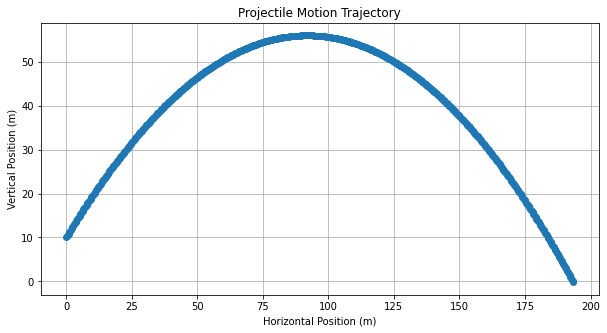

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration (m/s^2)
dt = 0.01  # time step (s)

# Initial conditions
vx = 30  # horizontal velocity (m/s)
vy = 30  # initial vertical velocity (m/s)
x = 0  # initial horizontal position (m)
y = 10  # initial vertical position (m)

# Time simulation
t_final = 10  # total time of simulation (s)
n_steps = int(t_final / dt)  # number of steps

# Lists to store the trajectory points
x_list = [x]
y_list = [y]

# Simulation loop
for _ in range(n_steps):
    # Update positions using the current velocity
    x += vx * dt
    y += vy * dt
    
    # Update vertical velocity due to gravity
    vy -= g * dt
    
    # Append the new positions to the lists
    x_list.append(x)
    y_list.append(y)
    
    # Stop if the ball hits the ground
    if y <= 0:
        break

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(x_list, y_list, marker='o')
plt.title('Projectile Motion Trajectory')
plt.xlabel('Horizontal Position (m)')
plt.ylabel('Vertical Position (m)')
plt.grid(True)
plt.show()


让我想到另一个在高中很重要的运动是“简谐运动”

让我们也来模拟一下

```
一个小球一开始在x = 0的位置，以 v_x = 3m/s向右运动

同时受到 k = 1 N / m , F = - k x 的回复力

描述小球在10s内的运动，用Eular法和简单的Python编程进行实现
```

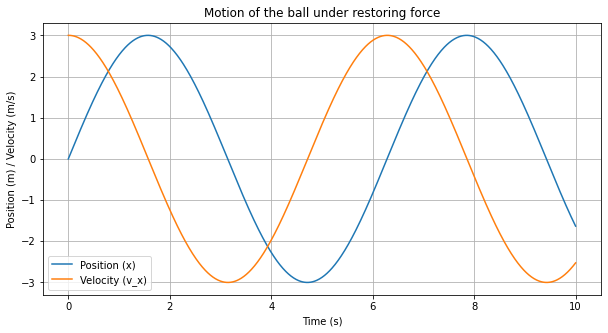

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
k = 1  # N/m
m = 1  # kg
v_x = 3  # 初始速度 m/s
x = 0  # 初始位置 m
t_max = 10  # 总时间 s
dt = 0.01  # 时间步长 s

# 存储结果的数组
time_array = np.arange(0, t_max + dt, dt)
x_array = np.zeros_like(time_array)
v_x_array = np.zeros_like(time_array)

# 初始条件
x_array[0] = x
v_x_array[0] = v_x

# 欧拉法模拟
for i in range(1, len(time_array)):
    a_x = -k * x_array[i-1] / m  # 计算加速度
    v_x_array[i] = v_x_array[i-1] + a_x * dt  # 计算速度
    x_array[i] = x_array[i-1] + v_x_array[i] * dt  # 计算位置

# 结果绘图
plt.figure(figsize=(10, 5))
plt.plot(time_array, x_array, label="Position (x)")
plt.plot(time_array, v_x_array, label="Velocity (v_x)")
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Velocity (m/s)')
plt.legend()
plt.title('Motion of the ball under restoring force')
plt.grid(True)
plt.show()


可以说这个模拟还是很不错的。

在之前没有ChatGPT的时候，我们也会让同学们把x，v和t存储到excel中

再借由excel的画图功能进行画图。

但是显然，有了ChatGPT之后，我们可以一次性快速学怎么用python进行可视化。

## 累计误差

我们需要说明的是，Eular法只是最简单，直观的物理模拟手段。

用Eular法进行物理模拟，是会有很大的累计误差的。

```
{粘贴第一段自由落体运动的代码}

这段代码可以正确运行，用到了Eular进行物理模拟

现在考虑y方向的运动，实际上也可以直接写出y(t)的解析表达式

我希望分析y(t)的解析解和Eular模拟结果的累计误差

同时用plt绘制 y vs. t 以及 error vs. t的曲线

请用python为我实现
```

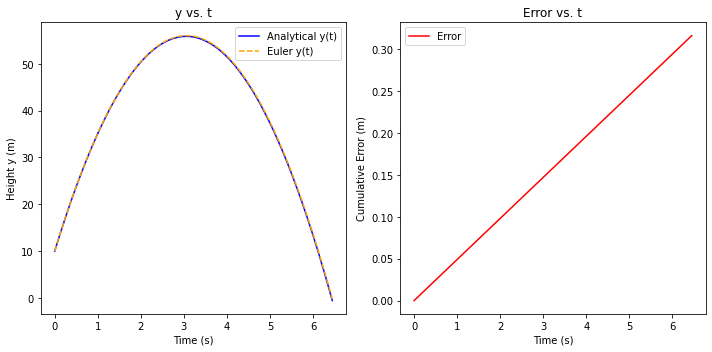

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
g = 9.81  # gravitational acceleration (m/s^2)
dt = 0.01  # time step (s)

# Initial conditions
vx = 30  # horizontal velocity (m/s)
vy = 30  # initial vertical velocity (m/s)
x = 0  # initial horizontal position (m)
y = 10  # initial vertical position (m)

# Time simulation
t_final = 10  # total time of simulation (s)
n_steps = int(t_final / dt)  # number of steps
time = np.linspace(0, t_final, n_steps+1)

# Analytical solution for y(t)
y_analytical = y + vy * time - 0.5 * g * time**2

# Lists to store the trajectory points
x_list = [x]
y_list = [y]
y_euler = [y]

# Simulation loop
for _ in range(n_steps):
    # Update positions using the current velocity
    x += vx * dt
    y += vy * dt
    
    # Update vertical velocity due to gravity
    vy -= g * dt
    
    # Append the new positions to the lists
    x_list.append(x)
    y_list.append(y)
    y_euler.append(y)
    
    # Stop if the ball hits the ground
    if y <= 0:
        break

# Truncate time array to match the simulation duration
time = time[:len(y_euler)]
y_analytical = y_analytical[:len(y_euler)]

# Calculate cumulative error between analytical and Euler solution
error = np.abs(np.array(y_euler) - y_analytical)

# Plot y vs. t
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(time, y_analytical, label='Analytical y(t)', color='blue')
plt.plot(time, y_euler, label='Euler y(t)', color='orange', linestyle='dashed')
plt.xlabel('Time (s)')
plt.ylabel('Height y (m)')
plt.legend()
plt.title('y vs. t')

# Plot error vs. t
plt.subplot(1, 2, 2)
plt.plot(time, error, label='Error', color='red')
plt.xlabel('Time (s)')
plt.ylabel('Cumulative Error (m)')
plt.legend()
plt.title('Error vs. t')

plt.tight_layout()
plt.show()


可以看到随着实践不断演化，欧拉法的误差会越来越大。

## 课堂练习

尝试交换x更新和v更新两句代码的位置，看看误差有没有改变。


---

这个误差实际上是非常明显的，我们下面来进行另一个高中中非常常见的运动模拟：天体运动

```
用Python模拟 地球 相对于太阳的运动，

模拟的实践跨度是10年。

用欧拉法进行模拟，并绘制出地球相对于太阳的运动轨迹。
```

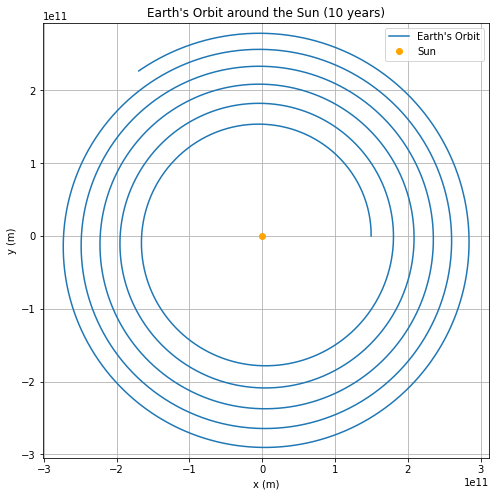

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # mass of the Sun (kg)
AU = 1.496e11  # astronomical unit (m)
year = 3.154e7  # seconds in a year

# Initial conditions (Earth's orbit)
x = AU  # initial position (m)
y = 0
last_vx = 0  # initial velocity (m/s)
last_vy = 29.78e3  # initial velocity (m/s)
dt = 24*3600  # time step: one day in seconds
t_final = 10 * year  # 10 years in seconds
n_steps = int(t_final / dt)  # number of steps

# Lists to store the trajectory points
x_list = [x]
y_list = [y]

# Simulation loop using Euler's method
for _ in range(n_steps):
    # Calculate the distance from the Sun
    r = np.sqrt(x**2 + y**2)
    
    # Calculate the gravitational force components
    fx = -G * M_sun * x / r**3
    fy = -G * M_sun * y / r**3

    # Update velocities
    vx = last_vx + fx * dt
    vy = last_vy + fy * dt

    # Update positions
    x += last_vx * dt
    y += last_vy * dt
    
    last_vx = vx
    last_vy = vy
    
    # Store the positions
    x_list.append(x)
    y_list.append(y)

# Plotting the trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, label='Earth\'s Orbit')
plt.plot(0, 0, 'o', label='Sun', color='orange')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Earth\'s Orbit around the Sun (10 years)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


可以看到圆的轨迹甚至不是闭合的，这显然是不正确的！

当然这段代码如果我们做轻微的修改，可以部分减少这个误差

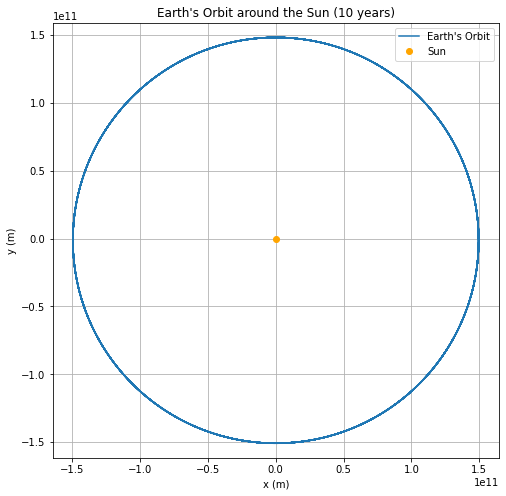

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # mass of the Sun (kg)
AU = 1.496e11  # astronomical unit (m)
year = 3.154e7  # seconds in a year

# Initial conditions (Earth's orbit)
x = AU  # initial position (m)
y = 0
vx = 0  # initial velocity (m/s)
vy = 29.78e3  # initial velocity (m/s)
dt = 24*3600  # time step: one day in seconds
t_final = 10 * year  # 10 years in seconds
n_steps = int(t_final / dt)  # number of steps

# Lists to store the trajectory points
x_list = [x]
y_list = [y]

# Simulation loop using Euler's method
for _ in range(n_steps):
    # Calculate the distance from the Sun
    r = np.sqrt(x**2 + y**2)
    
    # Calculate the gravitational force components
    fx = -G * M_sun * x / r**3
    fy = -G * M_sun * y / r**3
    
    # Update velocities
    vx += fx * dt
    vy += fy * dt
    
    # Update positions
    x += vx * dt
    y += vy * dt
    
    # Store the positions
    x_list.append(x)
    y_list.append(y)

# Plotting the trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, label='Earth\'s Orbit')
plt.plot(0, 0, 'o', label='Sun', color='orange')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Earth\'s Orbit around the Sun (10 years)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


可以看到仅仅是调整了vx和x的更新代码顺序，误差就大大减小了。

但是这背后的原理非常复杂，后面一段代码，实际上把Eular法调整为了半隐式方法(Semi-Implicit或者Symplectic)

这两种方法都涉及大二大三才会学习的一门《数值计算》的课程的内容。

在工程上，我们一般都会用龙格库塔的方法来计算这个动力学系统，Eular法可以看成是这个方法的极度简化版本

我们可以要求ChatGPT把这段程序改为龙格库塔的方法

```
{模拟的代码}

请帮我把这段代码的模拟过程改为用龙格库塔方法进行模拟
```

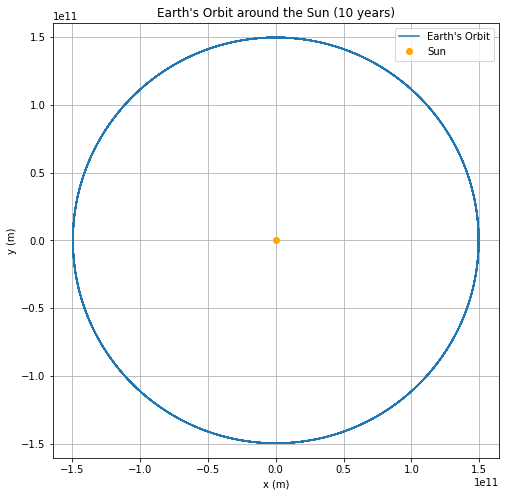

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Constants
G = 6.67430e-11  # gravitational constant (m^3 kg^-1 s^-2)
M_sun = 1.989e30  # mass of the Sun (kg)
AU = 1.496e11  # astronomical unit (m)
year = 3.154e7  # seconds in a year

# Initial conditions (Earth's orbit)
x = AU  # initial position (m)
y = 0
vx = 0  # initial velocity (m/s)
vy = 29.78e3  # initial velocity (m/s)
dt = 24*3600  # time step: one day in seconds
t_final = 10 * year  # 10 years in seconds
n_steps = int(t_final / dt)  # number of steps

# Lists to store the trajectory points
x_list = [x]
y_list = [y]

def derivatives(x, y, vx, vy):
    """ Calculate the derivatives for the RK4 method. """
    r = np.sqrt(x**2 + y**2)
    fx = -G * M_sun * x / r**3
    fy = -G * M_sun * y / r**3
    return fx, fy

# Simulation loop using RK4 method
for _ in range(n_steps):
    # k1
    fx1, fy1 = derivatives(x, y, vx, vy)
    kx1 = vx * dt
    ky1 = vy * dt
    kvx1 = fx1 * dt
    kvy1 = fy1 * dt
    
    # k2
    fx2, fy2 = derivatives(x + kx1/2, y + ky1/2, vx + kvx1/2, vy + kvy1/2)
    kx2 = (vx + kvx1/2) * dt
    ky2 = (vy + kvy1/2) * dt
    kvx2 = fx2 * dt
    kvy2 = fy2 * dt
    
    # k3
    fx3, fy3 = derivatives(x + kx2/2, y + ky2/2, vx + kvx2/2, vy + kvy2/2)
    kx3 = (vx + kvx2/2) * dt
    ky3 = (vy + kvy2/2) * dt
    kvx3 = fx3 * dt
    kvy3 = fy3 * dt
    
    # k4
    fx4, fy4 = derivatives(x + kx3, y + ky3, vx + kvx3, vy + kvy3)
    kx4 = (vx + kvx3) * dt
    ky4 = (vy + kvy3) * dt
    kvx4 = fx4 * dt
    kvy4 = fy4 * dt
    
    # Update positions and velocities using weighted sum of slopes
    x += (kx1 + 2*kx2 + 2*kx3 + kx4) / 6
    y += (ky1 + 2*ky2 + 2*ky3 + ky4) / 6
    vx += (kvx1 + 2*kvx2 + 2*kvx3 + kvx4) / 6
    vy += (kvy1 + 2*kvy2 + 2*kvy3 + kvy4) / 6
    
    # Store the positions
    x_list.append(x)
    y_list.append(y)

# Plotting the trajectory
plt.figure(figsize=(8, 8))
plt.plot(x_list, y_list, label='Earth\'s Orbit')
plt.plot(0, 0, 'o', label='Sun', color='orange')
plt.xlabel('x (m)')
plt.ylabel('y (m)')
plt.title('Earth\'s Orbit around the Sun (10 years)')
plt.legend()
plt.axis('equal')
plt.grid(True)
plt.show()


## 课堂练习

可以看到这个模拟是非常稳定的，误差也减小了很多，可以尝试把vx改为12e3之类的数值，就可以看到圆形的轨迹会进一步变成椭圆。

## 三体问题

```
我想用龙格库塔方法进行三体问题的模拟

帮我模拟三个质量相等的天体，在一定初速度下进行一段时间相互作用的轨迹，并进行可视化
```

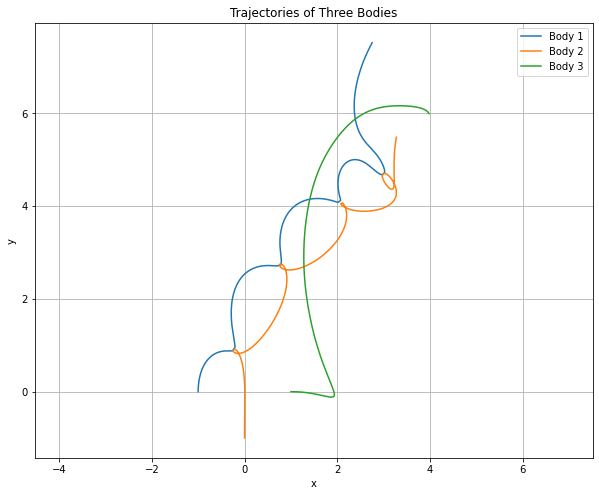

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def three_body_equations(t, y, masses):
    n = len(y) // 6  # Number of bodies
    r = y[:3*n].reshape((n, 3))
    v = y[3*n:].reshape((n, 3))
    a = np.zeros((n, 3))
    
    # Calculate accelerations
    for i in range(n):
        for j in range(n):
            if i != j:
                r_diff = r[j] - r[i]
                dist = np.linalg.norm(r_diff)
                a[i] += masses[j] * r_diff / dist**3
    
    dydt = np.concatenate((v.ravel(), a.ravel()))
    return dydt

# Constants and initial conditions
masses = np.array([1, 1, 1])  # Masses of the three bodies
# Initial positions (x, y, z) and velocities (vx, vy, vz) for each body
initial_conditions = np.array([
    -1, 0, 0, 0, -1, 0,  # Body 1
    1, 0, 0, 0, 1, 0,   # Body 2
    0, 1, 0, 1, 0, 0    # Body 3
])

# Time span for the simulation
t_span = (0, 10)
t_eval = np.linspace(t_span[0], t_span[1], 500)

# Solve the ODE
solution = solve_ivp(three_body_equations, t_span, initial_conditions, args=(masses,),
                     t_eval=t_eval, method='RK45')

# Extract positions
positions = solution.y[:9].reshape(3, 3, -1)

# Plotting
plt.figure(figsize=(10, 8))
for i in range(3):
    plt.plot(positions[i][0], positions[i][1], label=f'Body {i+1}')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('Trajectories of Three Bodies')
plt.grid(True)
plt.axis('equal')
plt.show()
